In [1]:
import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim
import geojson
from shapely import geometry
from sentinelsat import SentinelAPI
from datetime import date
import utm
from ipyleaflet import Map, Marker, basemaps, basemap_to_tiles
from ipyleaflet import Polygon as ipylPolygon
from dotenv import dotenv_values
import Path from pathlib

SyntaxError: invalid syntax (486960429.py, line 12)

In [2]:
## 3 secure login
conf= dotenv_values("compernicus.env")
test_conf=dotenv_values("compernicus.env")
test_conf
conf=dotenv_values("compernicus.env")

NameError: name 'dotenv_values' is not defined

In [ ]:
adress={'country':'France','city':'Rouffach'}
geolocator=Nominatim(user_agent="osmandaway")

In [3]:
location=geolocator.geocode(adress)
type(location)

geopy.location.Location

In [4]:
location.address

'Rouffach, Thann-Guebwiller, Haut-Rhin, Grand Est, France métropolitaine, 68250, France'

In [5]:
location.latitude, location.longitude

(47.96852955, 7.305268542571866)

In [33]:
latlon = (location.latitude, location.longitude)

m = Map(
    basemap=basemap_to_tiles(basemaps.Esri.WorldImagery),
    center=(latlon[0], latlon[1]),
    zoom=10
)

m.add_layer(Marker(location=latlon))
m

Map(center=[47.96852955, 7.305268542571866], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_…

In [7]:
utm.from_latlon(location.latitude,location.longitude)

(373505.67235979013, 5314192.1795177, 32, 'T')

In [8]:
x,y, zone, zoneLetter= utm.from_latlon(location.latitude,location.longitude)
x=round(x,2)
y=round(y,2)
print(x,y)

373505.67 5314192.18


In [9]:
offset= 15 * 1000

upl = (x-offset, y+offset)  # upper left
upr = (x+offset, y+offset)  # upper right
dwr = (x+offset, y-offset)  # lower right
dwl = (x-offset, y-offset)  # lower left

utmCoord=[upl,upr,dwr,dwl]
utmCoord

[(358505.67, 5329192.18),
 (388505.67, 5329192.18),
 (388505.67, 5299192.18),
 (358505.67, 5299192.18)]

In [10]:
for p in utmCoord:
    print(p)

(358505.67, 5329192.18)
(388505.67, 5329192.18)
(388505.67, 5299192.18)
(358505.67, 5299192.18)


In [36]:
geo1Coord=[] #latitude 50, longitude 19 for ipyleaf
geo2Coord=[] # longitude 19, latitude 50 for download data
for p in utmCoord:
    lat,lon=utm.to_latlon(*p,zone,zoneLetter)
    geo1Coord.append([round(lat,7),round(lon,7)])
    geo2Coord.append([round(lon,7),round(lat,7)])
print(f'{geo1Coord}\n\n {geo2Coord}')

[[48.1002722, 7.0994558], [48.1062295, 7.5022523], [47.8364043, 7.5100359], [47.8305029, 7.1093301]]

 [[7.0994558, 48.1002722], [7.5022523, 48.1062295], [7.5100359, 47.8364043], [7.1093301, 47.8305029]]


In [12]:
xx = np.array(geoCoord)
xx

array([[48.1002722,  7.0994558],
       [48.1062295,  7.5022523],
       [47.8364043,  7.5100359],
       [47.8305029,  7.1093301]])

c:\Anaconda\envs\sent\lib\site-packages\IPython\core\interactiveshell.py:3398: ShapelyDeprecationWarning: The proxy geometries (through the 'asShape()', 'asPolygon()' or 'PolygonAdapter()' constructors) are deprecated and will be removed in Shapely 2.0. Use the 'shape()' function or the standard 'Polygon()' constructor instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


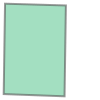

In [13]:
geoPolygon=geometry.asPolygon(geoCoord)
geoPolygon

In [14]:
print(geoPolygon)

POLYGON ((48.1002722 7.0994558, 48.1062295 7.5022523, 47.8364043 7.5100359, 47.8305029 7.1093301, 48.1002722 7.0994558))


In [15]:
geoPolygon.wkt

'POLYGON ((48.1002722 7.0994558, 48.1062295 7.5022523, 47.8364043 7.5100359, 47.8305029 7.1093301, 48.1002722 7.0994558))'

# 4.5 Coords to goejson file

In [37]:
path_json1=Path('data/lat_lon.json')
path_json2=Path('data/lon_lat.json')
path_utm=Path('data/polygon_utm.json')


NameError: name 'Path' is not defined

In [38]:
lat_lon=geojson.Polygon(geo1Coord)
lon_lat=geojson.Polygon(geo2Coord)
lat_lon, lon_lat


({"coordinates": [[48.100272, 7.099456], [48.10623, 7.502252], [47.836404, 7.510036], [47.830503, 7.10933]], "type": "Polygon"},
 {"coordinates": [[7.099456, 48.100272], [7.502252, 48.10623], [7.510036, 47.836404], [7.10933, 47.830503]], "type": "Polygon"})

In [ ]:
data_utm=geojson.Polygon(utmCoord)
data_utm

In [ ]:
with open(path_json1, 'w') as f:
    geojson.dump(lat_lon, f,indent=4)

with open(path_json2, 'w') as f:
    geojson.dump(lon_lat, f,indent=4)

with open(path_utm, 'r') as f:
    lat_lon_json = geojson.load(f)

## APi

In [18]:
api=SentinelAPI('osmandaway','Daway0123&*','https://scihub.copernicus.eu/dhus')

In [19]:
products = api.query(geoPolygon,
                    date=('20220501', '20220531'),
                    platformname='Sentinel-2',
                    cloudcoverpercentage=(0, 20)
                    )

In [20]:
df = pd.DataFrame(products).T
df

,title,link,link_alternative,link_icon,summary,ondemand,generationdate,beginposition,endposition,ingestiondate,...,platformserialidentifier,processinglevel,datastripidentifier,granuleidentifier,identifier,uuid,datatakesensingstart,sensoroperationalmode,tileid,hv_order_tileid
f2991c4c-6d82-45d4-a136-ba9949c4423e,S2B_MSIL2A_20220529T070619_N0400_R106_T38NRP_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-05-29T07:06:19.024Z, Instrument: MS...",false,2022-05-29 09:45:10,2022-05-29 07:06:19.024,2022-05-29 07:06:19.024,2022-05-29 11:56:16.109,...,Sentinel-2B,Level-2A,S2B_OPER_MSI_L2A_DS_2BPS_20220529T094510_S2022...,S2B_OPER_MSI_L2A_TL_2BPS_20220529T094510_A0273...,S2B_MSIL2A_20220529T070619_N0400_R106_T38NRP_2...,f2991c4c-6d82-45d4-a136-ba9949c4423e,NaT,NaN,NaN,NaN
889528c3-abba-47b4-8e87-4e61a132ed90,S2B_MSIL2A_20220529T070619_N0400_R106_T38NRN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-05-29T07:06:19.024Z, Instrument: MS...",false,2022-05-29 09:45:10,2022-05-29 07:06:19.024,2022-05-29 07:06:19.024,2022-05-29 11:52:28.652,...,Sentinel-2B,Level-2A,S2B_OPER_MSI_L2A_DS_2BPS_20220529T094510_S2022...,S2B_OPER_MSI_L2A_TL_2BPS_20220529T094510_A0273...,S2B_MSIL2A_20220529T070619_N0400_R106_T38NRN_2...,889528c3-abba-47b4-8e87-4e61a132ed90,NaT,NaN,NaN,NaN
346b0106-2dd0-4f30-8e5d-98a6b88df80f,S2B_MSIL1C_20220529T070619_N0400_R106_T38NRN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-05-29T07:06:19.024Z, Instrument: MS...",false,2022-05-29 09:16:21,2022-05-29 07:06:19.024,2022-05-29 07:06:19.024,2022-05-29 10:15:59.094,...,Sentinel-2B,Level-1C,S2B_OPER_MSI_L1C_DS_2BPS_20220529T091621_S2022...,S2B_OPER_MSI_L1C_TL_2BPS_20220529T091621_A0273...,S2B_MSIL1C_20220529T070619_N0400_R106_T38NRN_2...,346b0106-2dd0-4f30-8e5d-98a6b88df80f,2022-05-29 07:06:19.024,INS-NOBS,38NRN,NN38R
450fb7f7-7868-4889-b7c0-2f6b2daadadd,S2B_MSIL1C_20220529T070619_N0400_R106_T38NRP_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-05-29T07:06:19.024Z, Instrument: MS...",false,2022-05-29 09:16:21,2022-05-29 07:06:19.024,2022-05-29 07:06:19.024,2022-05-29 10:15:22.181,...,Sentinel-2B,Level-1C,S2B_OPER_MSI_L1C_DS_2BPS_20220529T091621_S2022...,S2B_OPER_MSI_L1C_TL_2BPS_20220529T091621_A0273...,S2B_MSIL1C_20220529T070619_N0400_R106_T38NRP_2...,450fb7f7-7868-4889-b7c0-2f6b2daadadd,2022-05-29 07:06:19.024,INS-NOBS,38NRP,NP38R
055b1726-2662-4cc8-a6e5-9184becbd8d4,S2B_MSIL2A_20220526T065619_N0400_R063_T38NRP_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-05-26T06:56:19.024Z, Instrument: MS...",false,2022-05-26 09:59:15,2022-05-26 06:56:19.024,2022-05-26 06:56:19.024,2022-05-26 14:04:23.345,...,Sentinel-2B,Level-2A,S2B_OPER_MSI_L2A_DS_2BPS_20220526T095915_S2022...,S2B_OPER_MSI_L2A_TL_2BPS_20220526T095915_A0272...,S2B_MSIL2A_20220526T065619_N0400_R063_T38NRP_2...,055b1726-2662-4cc8-a6e5-9184becbd8d4,NaT,NaN,NaN,NaN
496e7361-4aa0-4dc8-96bc-95ebc15aef99,S2A_MSIL2A_20220524T070631_N0400_R106_T38NRN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-05-24T07:06:31.024Z, Instrument: MS...",false,2022-05-24 12:48:19,2022-05-24 07:06:31.024,2022-05-24 07:06:31.024,2022-05-24 17:47:54.893,...,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_ATOS_20220524T124819_S2022...,S2A_OPER_MSI_L2A_TL_ATOS_20220524T124819_A0361...,S2A_MSIL2A_20220524T070631_N0400_R106_T38NRN_2...,496e7361-4aa0-4dc8-96bc-95ebc

In [21]:
idx = df.cloudcoverpercentage == min(df.cloudcoverpercentage)

In [22]:
uuid = df.uuid.loc[idx][0]
uuid

'8dc431e0-a8eb-4055-8ee9-893190199375'

In [23]:
df.title.loc[idx]

8dc431e0-a8eb-4055-8ee9-893190199375    S2A_MSIL1C_20220521T065631_N0400_R063_T38NRN_2...
c4fdf8a9-e408-41da-b12a-a60984f54e6c    S2B_MSIL1C_20220519T070619_N0400_R106_T38NRN_2...
1e71454c-11d7-4b71-9342-1946dad83959    S2B_MSIL1C_20220516T065619_N0400_R063_T38NRP_2...
Name: title, dtype: object

In [24]:
df.link[:3]

f2991c4c-6d82-45d4-a136-ba9949c4423e    https://scihub.copernicus.eu/dhus/odata/v1/Pro...
889528c3-abba-47b4-8e87-4e61a132ed90    https://scihub.copernicus.eu/dhus/odata/v1/Pro...
346b0106-2dd0-4f30-8e5d-98a6b88df80f    https://scihub.copernicus.eu/dhus/odata/v1/Pro...
Name: link, dtype: object

In [25]:
df.cloudcoverpercentage

f2991c4c-6d82-45d4-a136-ba9949c4423e    16.601875
889528c3-abba-47b4-8e87-4e61a132ed90    16.401613
346b0106-2dd0-4f30-8e5d-98a6b88df80f    14.043889
450fb7f7-7868-4889-b7c0-2f6b2daadadd     11.58741
055b1726-2662-4cc8-a6e5-9184becbd8d4    13.145912
496e7361-4aa0-4dc8-96bc-95ebc15aef99    12.111505
5a719cb4-4093-424d-a2b6-be236785d52f      9.06012
078754b0-8946-485c-a176-79a6f2bb6bb0     1.075593
43b25f92-7995-4b9f-85b2-385ead27e392    11.361731
8dc431e0-a8eb-4055-8ee9-893190199375          0.0
1a666047-549d-4fb2-8bb5-362cb5498ac4     0.000083
6d9c1960-9c49-4f71-a8a1-78b54111badf     4.388965
c4fdf8a9-e408-41da-b12a-a60984f54e6c          0.0
093cb9eb-2010-495c-8986-30159112692d     2.325852
c2fd024e-49b9-4c8e-9f84-be698a8ea2ce     1.184868
f75ef4ec-8c9c-4dfb-a29f-fae5db92a5f1     0.050401
1e71454c-11d7-4b71-9342-1946dad83959          0.0
bbaa6cb7-a868-4fe7-bd0f-074c85e9a7d5     0.580863
51bc0ff2-8708-4928-a052-9268ac3d096e     3.052656
8d4591d2-b49a-4e05-ac3c-0cd1f8f5b06d     7.664728


In [27]:
api.download('f75ef4ec-8c9c-4dfb-a29f-fae5db92a5f1', 'imgs/sentinel/')

MD5 checksumming:   0%|          | 0.00/1.03G [00:00<?, ?B/s]

{'id': 'f75ef4ec-8c9c-4dfb-a29f-fae5db92a5f1',
 'title': 'S2B_MSIL2A_20220516T065619_N0400_R063_T38NRP_20220516T100937',
 'size': 1028914902,
 'md5': '2fced137d3c1215e37fe28163ab659db',
 'date': datetime.datetime(2022, 5, 16, 6, 56, 19, 24000),
 'footprint': 'POLYGON((47.801541217733885 7.140219635862032,47.8261216098428 7.251699007580729,47.858681113659465 7.400335996972613,47.89142346761316 7.548873299144915,47.924361724227325 7.697283734097688,47.95706507322189 7.845760141685897,47.98988958750889 7.994215950702571,48.01996383446892 8.130548916872261,48.717158464580585 8.125022545190241,48.7085993421091 7.133901712573143,47.801541217733885 7.140219635862032))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('f75ef4ec-8c9c-4dfb-a29f-fae5db92a5f1')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2022, 5, 16, 13, 22, 25, 239000),
 'Ingestion Date': datetime.datetime(2022, 5, 16, 13, 21, 16, 652000),
 'quicklook_url': "https://scihub.copernicus.eu/dhus/odata/v

## 3 secure login

In [30]:
conf= dotenv_values("compernicus.env")

In [31]:
test_conf=dotenv_values("compernicus.env")
test_conf

OrderedDict([('user', 'osmandaway'), ('passw', 'Daway0123&*')])

In [32]:
conf=dotenv_values("compernicus.env")